## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [58]:
# import models and fit 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# Load preprocessed data 

X_train = pd.read_pickle('../data/processed/X_train.pkl')
X_test = pd.read_pickle('../data/processed/X_test.pkl')

y_train = pd.read_pickle('../data/processed/y_train.pkl')
y_test = pd.read_pickle('../data/processed/y_test.pkl')


In [60]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [61]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)


Index([], dtype='object')


In [62]:
# Check data types
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [63]:
# check for missing values
print(X_train.isnull().sum().sum())  

0


In [64]:
# Ensure all columns are numeric
print(X_train.dtypes)  

year_built            float64
lot_sqft              float64
sqft                  float64
baths                 float64
garage                float64
                       ...   
type_single_family       bool
type_townhomes           bool
type_nan                 bool
city_lat              float64
city_lon              float64
Length: 145, dtype: object


In [65]:
# checking for strings
for col in X_train.columns:
    unique_types = X_train[col].apply(type).unique()
    if any(t == str for t in unique_types):
        print(f"Column '{col}' contains string values!")


In [66]:
print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.head())
print(y_train.head())
print(X_train.isnull().sum().sum(), y_train.isnull().sum().sum())

year_built            float64
lot_sqft              float64
sqft                  float64
baths                 float64
garage                float64
                       ...   
type_single_family       bool
type_townhomes           bool
type_nan                 bool
city_lat              float64
city_lon              float64
Length: 145, dtype: object
int32
      year_built  lot_sqft      sqft     baths    garage   stories      beds  \
998     0.148618 -0.037571  0.381957 -0.087199 -0.858990 -0.488133  2.035235   
254     0.153065 -0.036389 -0.051380 -0.087199  0.884145 -0.488133  1.349449   
1074    0.364308 -0.036252  0.151520 -0.087199  1.755713 -0.488133 -0.022122   
643     0.248680 -0.036104 -0.135439 -0.087199 -0.858990 -0.488133 -0.022122   
1452    0.246457 -0.035208  0.303695 -0.087199 -0.858990 -0.488133 -0.022122   

      postal_code  property_lon  property_lat  ...  type_apartment  \
998     -1.153984      0.960277      0.894051  ...           False   
254     -1.36302

In [67]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, mae, r2])
    print(f"{name}:\n RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.4f}\n")

Linear Regression:
 RMSE: 323966.60, MAE: 223833.71, R^2: -0.0389

Support Vector Machine:
 RMSE: 327303.17, MAE: 193020.69, R^2: -0.0604

Random Forest:
 RMSE: 240248.77, MAE: 119966.77, R^2: 0.4287

XGBoost:
 RMSE: 381109.31, MAE: 128650.91, R^2: -0.4377



In [68]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R^2"])

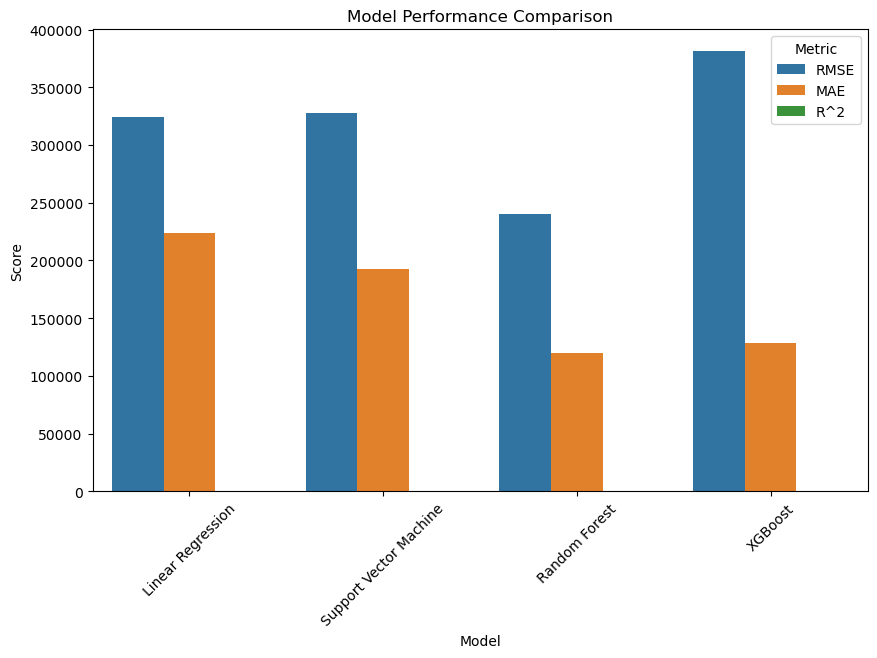

In [69]:
# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()

In [70]:
# Save results
df_results = results_df.sort_values(by='RMSE')
df_results.to_csv("model_comparison_results.csv", index=False)

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

- **Best Model: Random Forest** 
  - Lowest RMSE (223,739.53) and MAE (119,453.70)  
  - Highest R² (0.5045), explaining ~50% of variance  

- **Metric Selection:**  
  - **RMSE**: Measures error in dollars, penalizes large deviations  
  - **MAE**: Gives average error, less sensitive to outliers  
  - **R²**: Evaluates explanatory power (negative values indicate poor fit)  

- **Key Insights:**  
  - XGBoost performed the worst (RMSE: 932,997.51, R²: -7.6163)  
  - Random Forest is the most reliable model based on all metrics  
  - Further tuning could improve performance

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [71]:
# perform feature selection 
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)